## Testes para novo classificador

In [2]:
import pandas as pd
import polars as pl

In [3]:
df_signatures = pd.read_csv('/Users/carolina/Desktop/Mestrado/weekdays_datasets/df_signatures.csv')
df_signatures

,id,h00,h01,h02,h03,h04,h05,h06,h07,h08,...,h17,h18,h19,h20,h21,h22,h23,country,city,category
0,0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000119,...,0.896498,0.808148,0.462531,0.010060,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.003126,0.031889,0.234067,...,0.677492,0.475074,0.385600,0.248011,0.017268,0.000000,0.000000,0.0,0.0,0.0
2,2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000174,0.009180,0.138568,...,0.972788,0.965489,0.831592,0.573811,0.275817,0.002511,0.000106,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.001596,0.043055,0.531299,...,0.775702,0.628683,0.533388,0.353358,0.008911,0.000000,0.000000,0.0,0.0,0.0
4,4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000467,0.015091,0.179335,0.768777,...,0.412289,0.603218,0.448638,0.349549,0.154791,0.030829,0.000874,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,0.497889,0.302093,0.001882,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000041,0.005409,0.075049,0.140844,0.265839,0.581515,1.0,4.0,3.0
67,67,0.804521,0.541695,0.005939,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.076270,0.183042,0.224729,0.324142,0.479679,0.725018,0.896602,1.0,4.0,3.0
68,68,0.518485,0.394968,0.019825,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.556677,0.665041,0.706486,0.850784,0.827417,0.919327,0.747429,1.0,4.0,3.0
69,69,0.024066,0.000008,0.000000,0.00000,0.00002,0.000000,0.000000,0.000000,0.002157,...,0.327476,0.501589,0.829388,0.633860,0.500545,0.039253,0.019268,1.0,4.0,4.0


In [13]:
df_tsfel = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_features_new_clean.csv')
df_tsfel

,id,h01,h02,h03,h04,h05,h06,h07,h08,h09,...,0_Wavelet variance_12.5Hz,0_Wavelet variance_2.78Hz,0_Wavelet variance_25.0Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_3.57Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_5.0Hz,0_Wavelet variance_6.25Hz,0_Wavelet variance_8.33Hz,0_Zero crossing rate
0,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009199,...,0.135013,0.350354,0.055348,0.374657,0.371827,0.332009,0.256005,0.158831,0.099508,2.0
1,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.047258,0.210755,0.017510,0.243652,0.266225,0.270016,0.247738,0.195541,0.118002,2.0
2,2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.200353,0.359506,0.026226,0.414783,0.455802,0.476505,0.474555,0.451034,0.374289,2.0
3,3,0.000000,0.0,0.0,0.0,0.0,0.080787,0.303251,0.519247,0.688605,...,0.130506,0.650331,0.025610,0.712485,0.720895,0.651301,0.501350,0.317766,0.198137,2.0
4,4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.060529,0.172893,0.211369,...,0.146770,0.645115,0.021830,0.680435,0.665672,0.590342,0.464516,0.323574,0.225143,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,12699,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.127471,0.583408,0.038333,0.617643,0.609788,0.548983,0.436816,0.289192,0.163131,2.0
12700,12700,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.181369,0.332863,0.055123,0.347610,0.339244,0.305477,0.250778,0.188896,0.160689,4.0
12701,12701,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.037427,0.177333,0.014086,0.199679,0.212288,0.210719,0.192462,0.156509,0.099992,2.0
12702,12702,0.256943,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.169666,0.590733,0.022402,0.654275,0.710453,0.749736,0.726257,0.604719,0.403746,2.0


In [11]:
has_nan = df_tsfel.isnull().values.any()

if has_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans # achar kmeans normal

df = df_tsfel

numerical_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_df)

# fazer for para vários cluster
n_clusters = 100 
batch_size = 20000 

kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=0)
kmeans.fit(data_scaled)

df['Cluster'] = kmeans.labels_

df.to_csv("clustered_dataset.csv", index=False)


/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
df_clustered = pd.read_csv('clustered_dataset.csv')
df_clustered

,id,h01,h02,h03,h04,h05,h06,h07,h08,h09,...,0_Wavelet variance_2.78Hz,0_Wavelet variance_25.0Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_3.57Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_5.0Hz,0_Wavelet variance_6.25Hz,0_Wavelet variance_8.33Hz,0_Zero crossing rate,Cluster
0,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.009199,...,0.350354,0.055348,0.374657,0.371827,0.332009,0.256005,0.158831,0.099508,2.0,8
1,1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.210755,0.017510,0.243652,0.266225,0.270016,0.247738,0.195541,0.118002,2.0,80
2,2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.359506,0.026226,0.414783,0.455802,0.476505,0.474555,0.451034,0.374289,2.0,22
3,3,0.000000,0.0,0.0,0.0,0.0,0.080787,0.303251,0.519247,0.688605,...,0.650331,0.025610,0.712485,0.720895,0.651301,0.501350,0.317766,0.198137,2.0,29
4,4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.060529,0.172893,0.211369,...,0.645115,0.021830,0.680435,0.665672,0.590342,0.464516,0.323574,0.225143,2.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,12699,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.583408,0.038333,0.617643,0.609788,0.548983,0.436816,0.289192,0.163131,2.0,16
12700,12700,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.332863,0.055123,0.347610,0.339244,0.305477,0.250778,0.188896,0.160689,4.0,98
12701,12701,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.177333,0.014086,0.199679,0.212288,0.210719,0.192462,0.156509,0.099992,2.0,80
12702,12702,0.256943,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.590733,0.022402,0.654275,0.710453,0.749736,0.726257,0.604719,0.403746,2.0,99


### Quantitative Metrics

In [90]:
# t-sne
# orange

In [68]:
print("Inertia:", kmeans.inertia_)


Inertia: 666107.1117049844


In [69]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [70]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.08175390025904623


In [71]:
ch_score = calinski_harabasz_score(data_scaled, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 243.09018794477666


In [61]:
db_score = davies_bouldin_score(data_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", db_score)

Davies-Bouldin Index: 2.330453280265472


### Visual Analysis

In [62]:
import matplotlib.pyplot as plt

/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

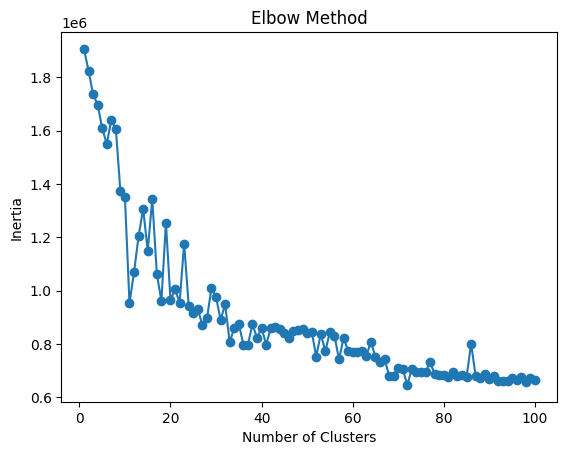

In [63]:
inertias = []
for k in range(1, 101):
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=20000, random_state=0)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 101), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


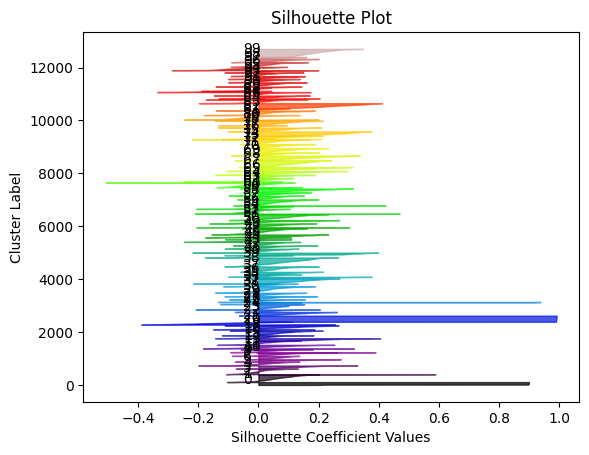

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_values = silhouette_samples(data_scaled, kmeans.labels_)
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    cluster_silhouette_values.sort()
    y_upper += len(cluster_silhouette_values)
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))
    y_lower = y_upper
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot")
plt.show()


In [ ]:
# Fazer um gráfico para cada n

### Qualitativy Analysis

In [65]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids (unscaled):", centroids)


Cluster Centroids (unscaled): [[ 1.13644760e+04  1.53244956e-03  8.32667268e-17 ...  3.27791951e-01
   2.22646215e-01  1.99387963e+00]
 [ 7.81077583e+03  5.55513904e-01  2.10396484e-01 ...  3.69601946e-01
   2.73937154e-01  2.02287406e+00]
 [ 7.10579537e+03  3.23113029e-02  2.71243633e-02 ...  3.43069210e+04
   3.40902241e+04  1.77220077e+00]
 ...
 [ 2.74595159e+03  2.10524027e-01  8.01821515e-02 ...  3.54127716e-01
   2.28031928e-01  1.95362319e+00]
 [ 1.11191847e+04 -7.38298311e-15 -4.21884749e-15 ...  2.17953322e-01
   1.63600016e-01  3.21363911e+00]
 [ 9.12134303e+03  2.95518559e-01  8.65037583e-02 ...  5.41242804e-01
   3.71981221e-01  1.99907822e+00]]


In [66]:
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} statistics:\n", cluster_data.describe())


Cluster 0 statistics:
                  id         h01    h02    h03    h04         h05         h06  \
count    108.000000  108.000000  108.0  108.0  108.0  108.000000  108.000000   
mean   11487.833333    0.001669    0.0    0.0    0.0    0.001955    0.054111   
std      739.664088    0.017347    0.0    0.0    0.0    0.000726    0.015950   
min     7185.000000    0.000000    0.0    0.0    0.0    0.000000    0.000000   
25%    11646.500000    0.000000    0.0    0.0    0.0    0.002222    0.059855   
50%    11689.500000    0.000000    0.0    0.0    0.0    0.002222    0.059855   
75%    11733.250000    0.000000    0.0    0.0    0.0    0.002222    0.059855   
max    12492.000000    0.180277    0.0    0.0    0.0    0.002222    0.059855   

              h07         h08         h09  ...  0_Wavelet variance_2.78Hz  \
count  108.000000  108.000000  108.000000  ...                 108.000000   
mean     0.389172    0.507606    0.532039  ...                   0.767354   
std      0.073791    0.05

Ranking dos Classificadores por f1-score médio:
              Classifier  f1_score_mean  f1_score_std
11                   tde       0.700464      0.032659
10              ridge_cv       0.692199      0.033174
2   best_of_m1_m2_models       0.690000      0.000000
8                  rSTSF       0.689921      0.046285
7            multirocket       0.687700      0.041148
4             hivecotev2       0.685398      0.033745
13              weasel_d       0.666610      0.123504
0                  DrCIF       0.654971      0.052469
1                  MrSQM       0.653591      0.056778
3       elastic_ensemble       0.639702      0.047335
12              ts_fresh       0.624511      0.083215
5            hydra_ridge       0.618241      0.197912
9                   rdst       0.614856      0.221751
6         inception_time       0.176556      0.070209


/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


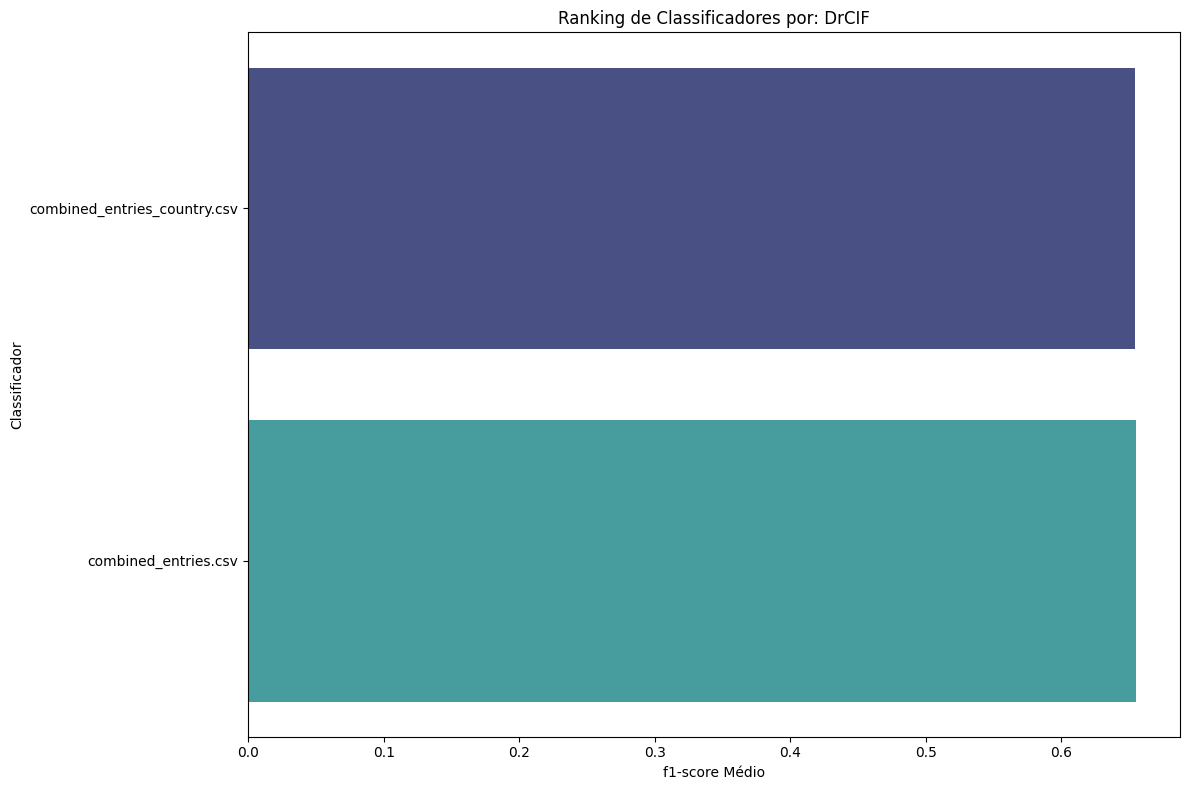

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


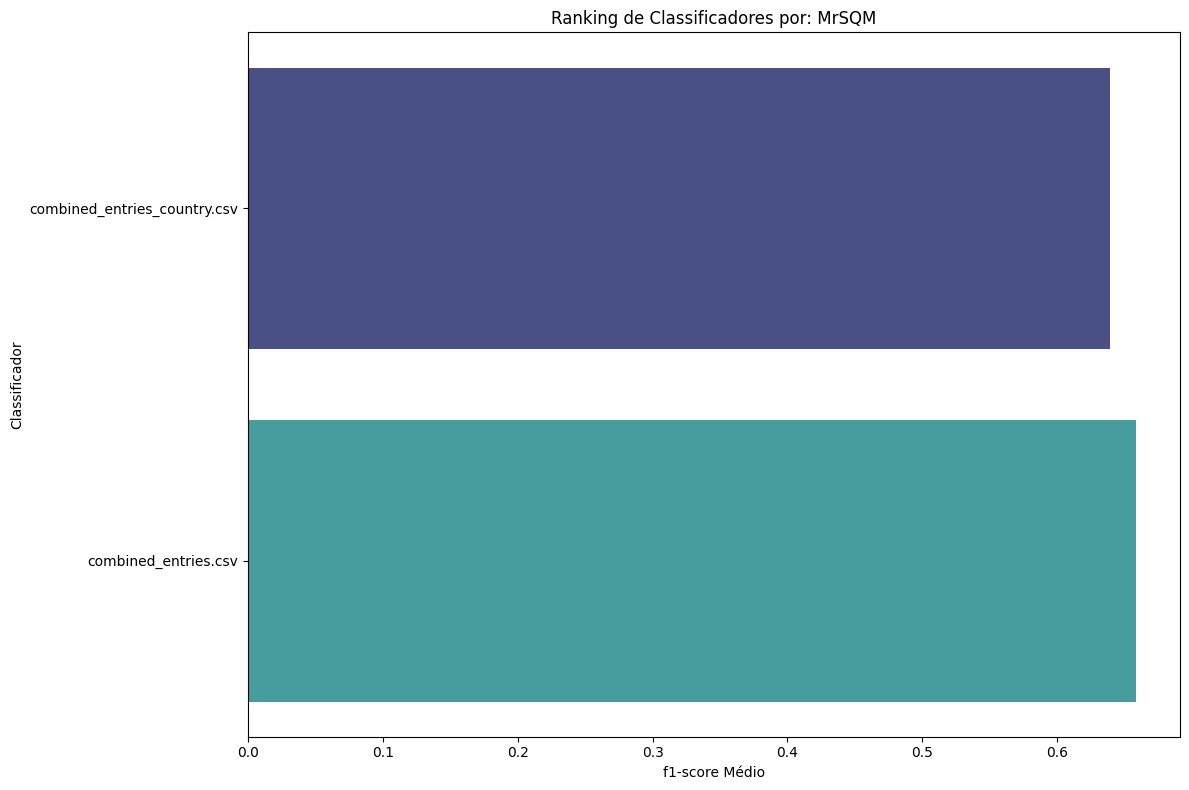

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


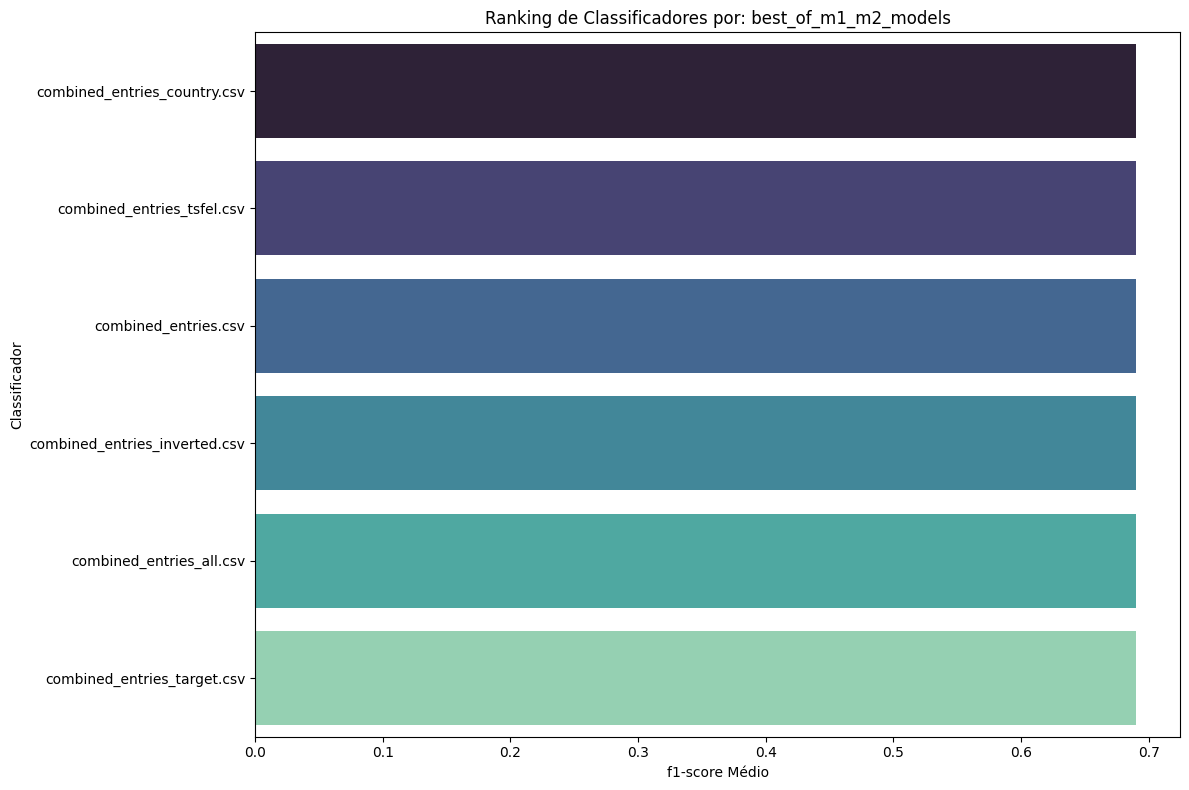

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


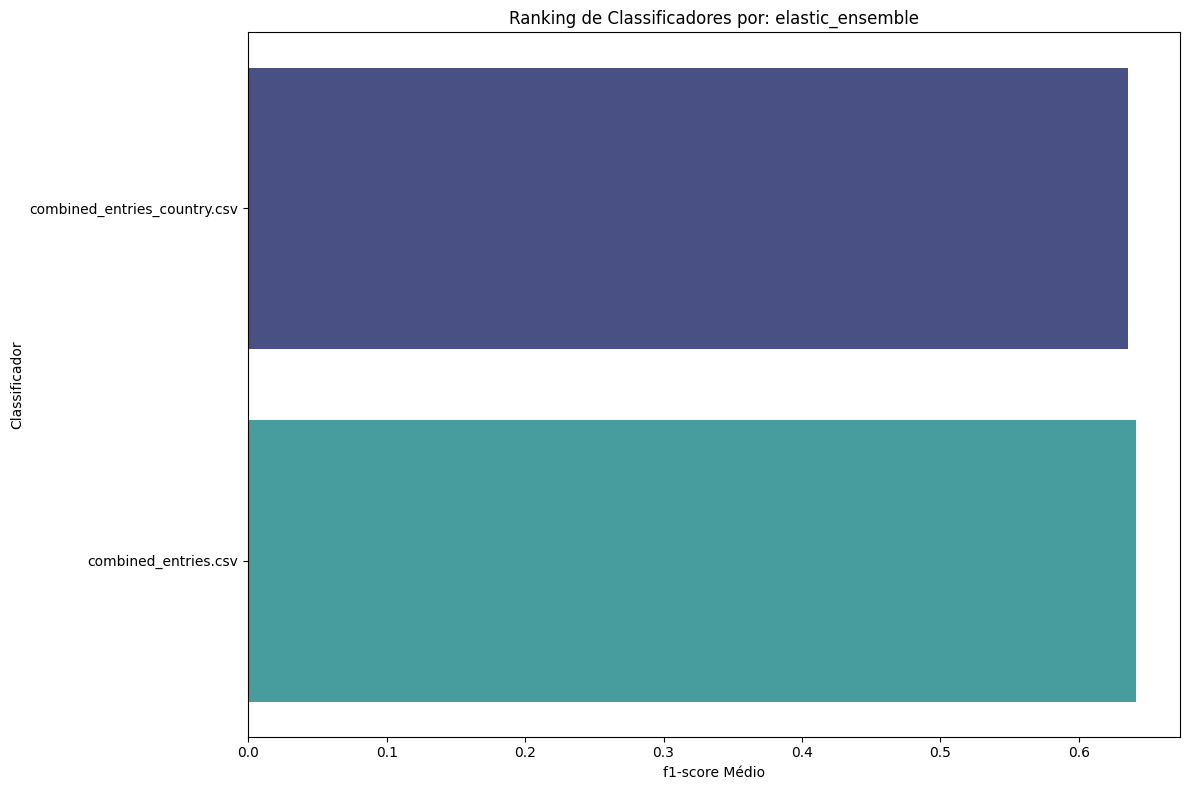

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


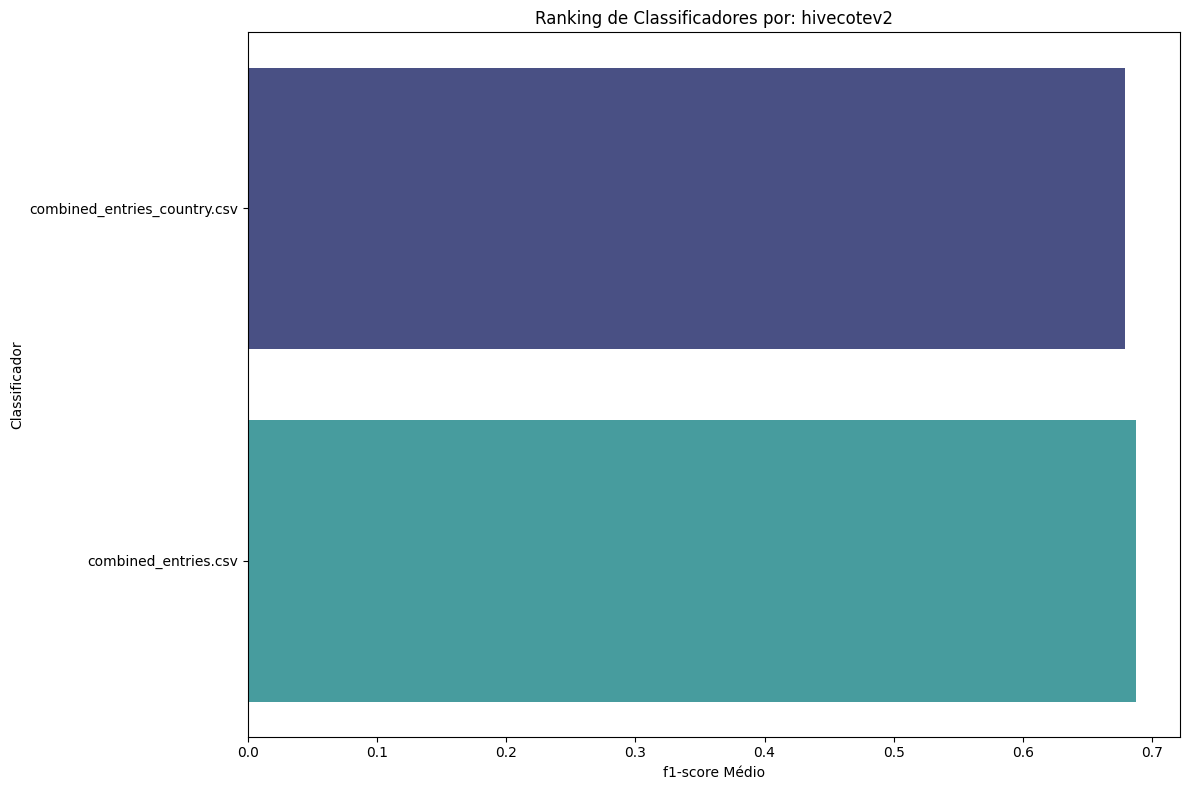

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


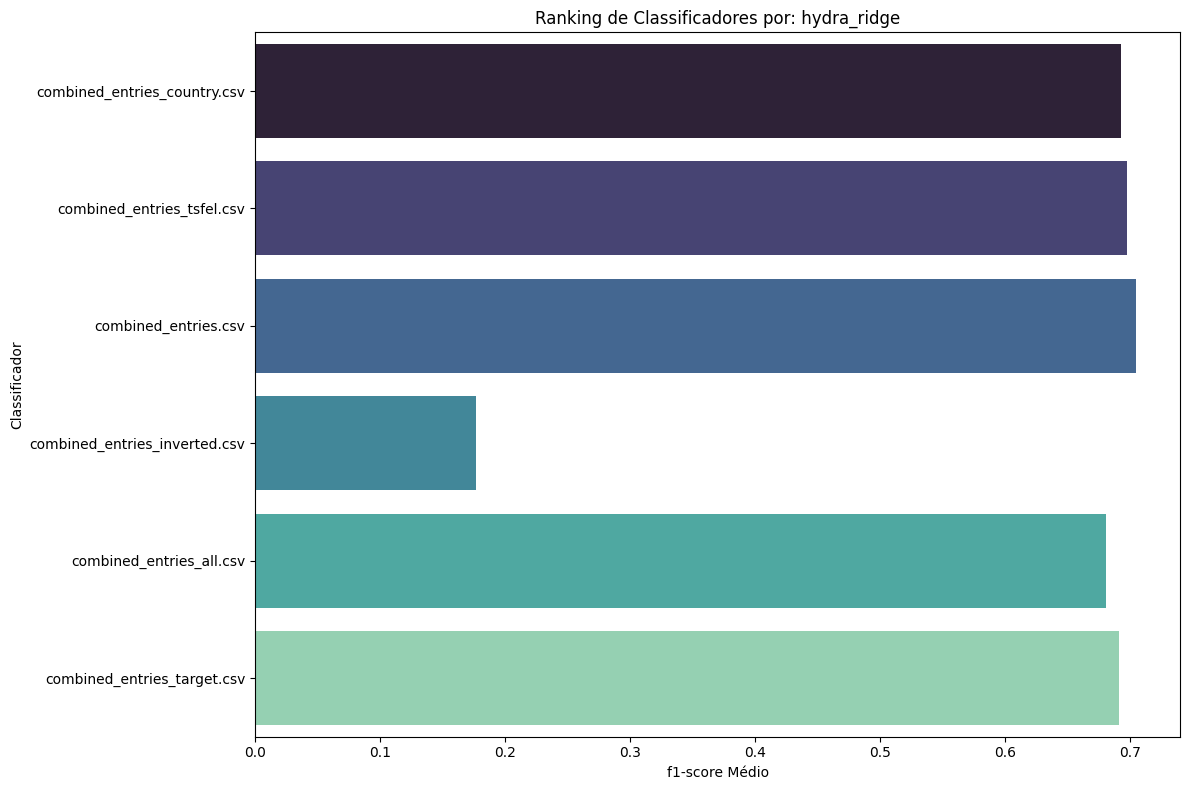

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


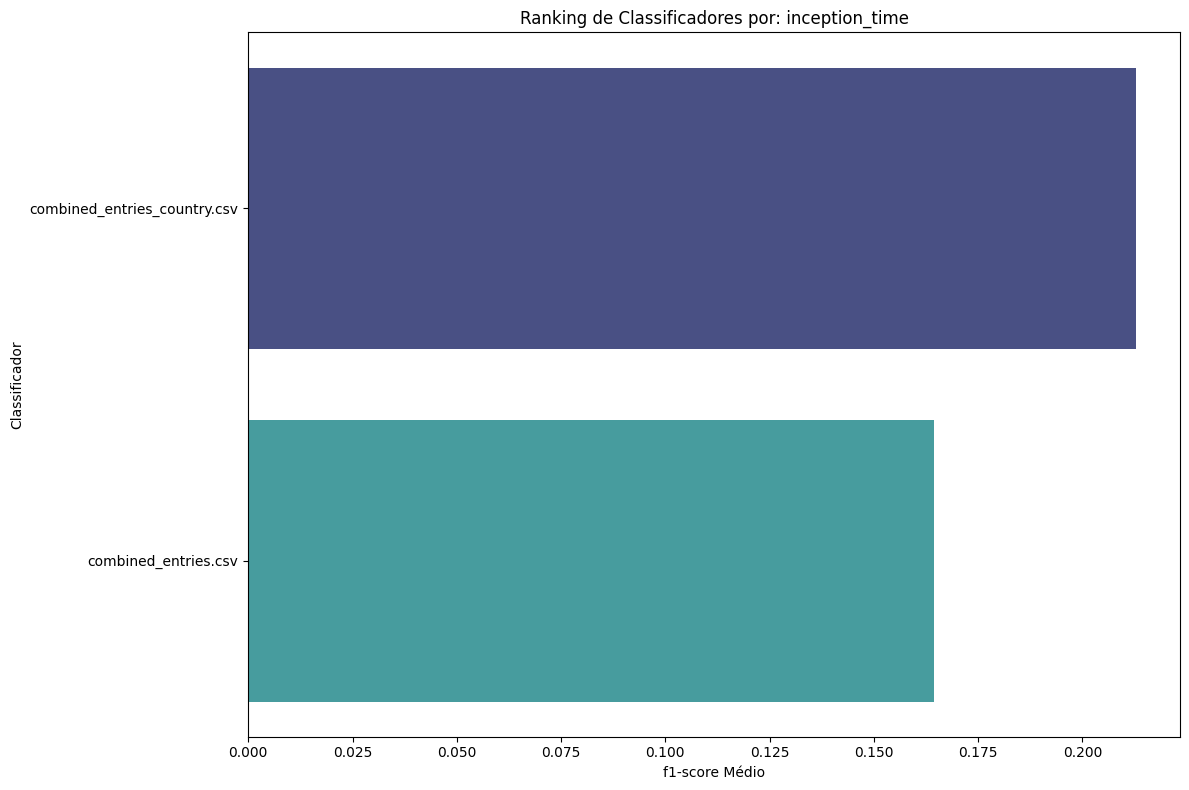

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


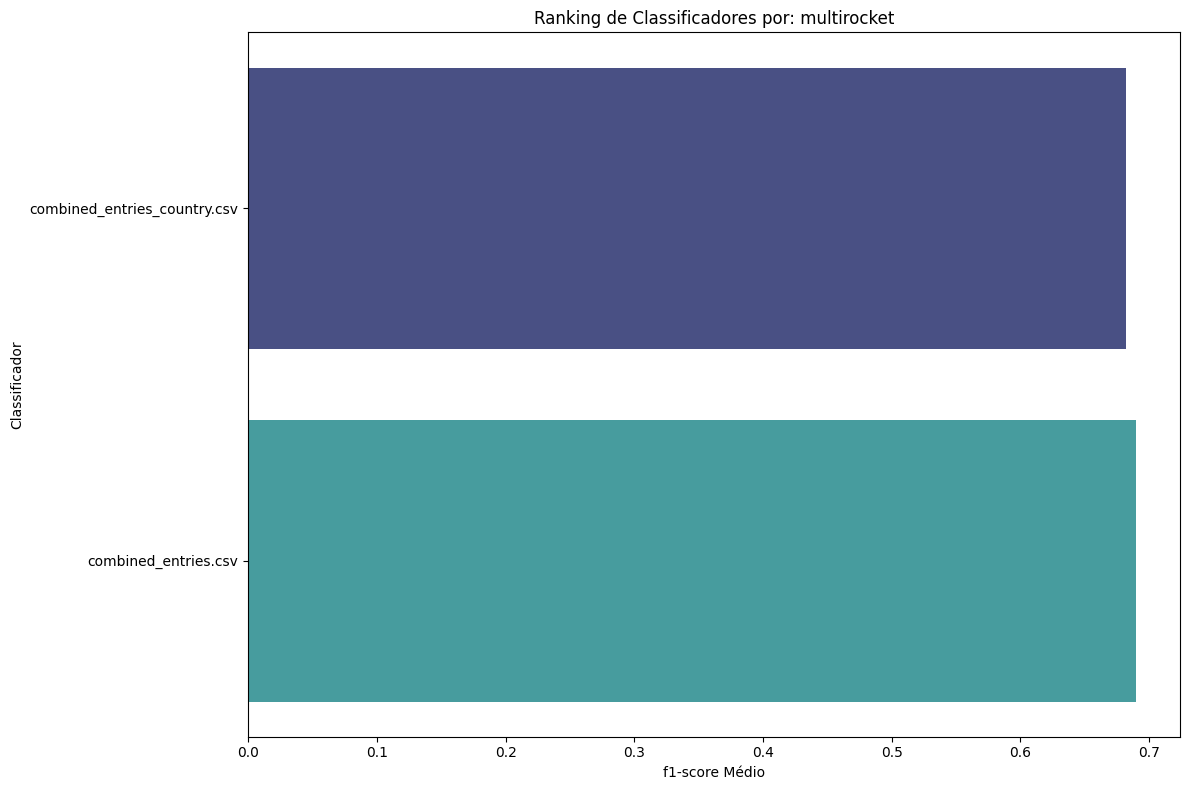

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


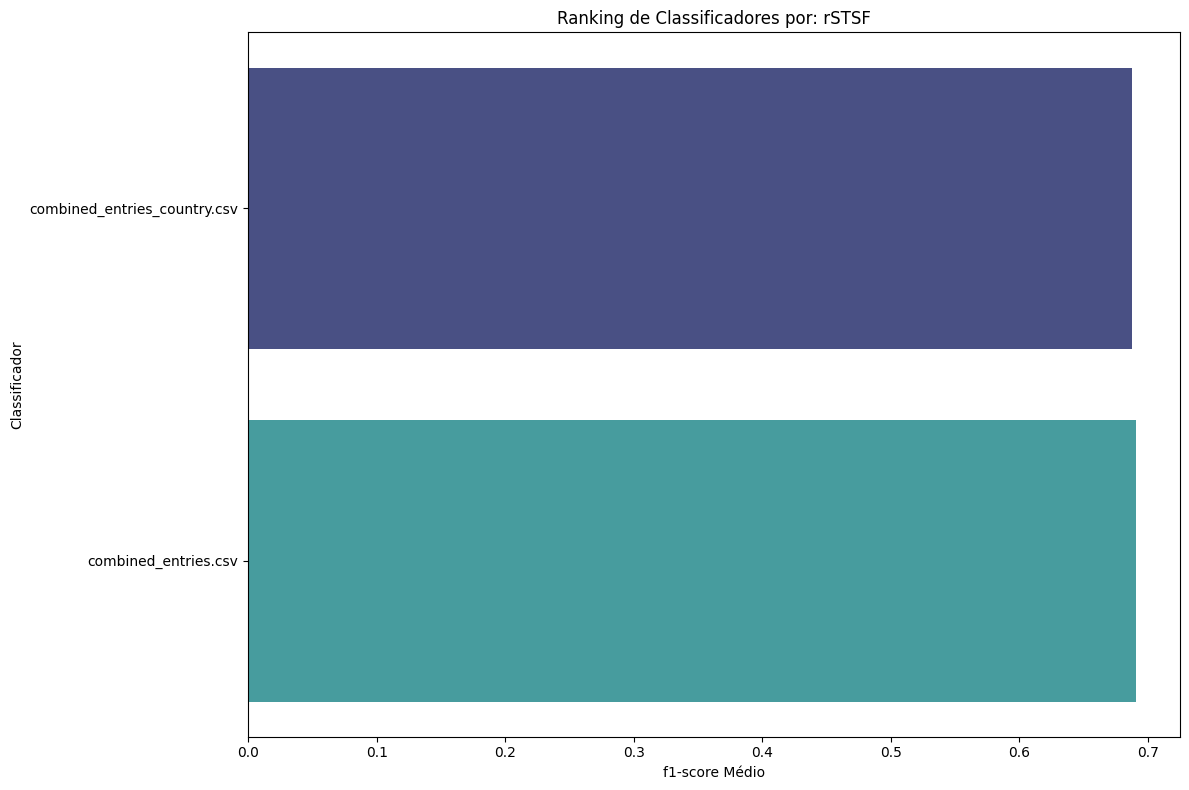

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


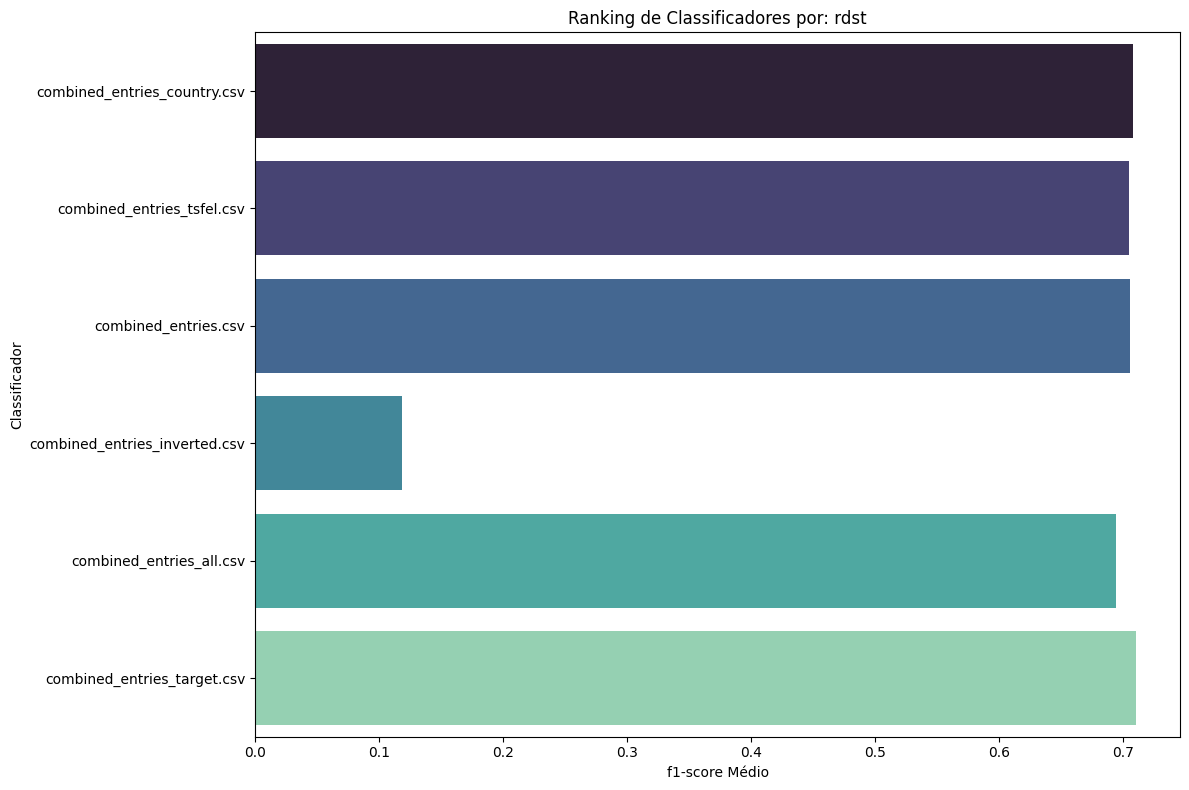

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


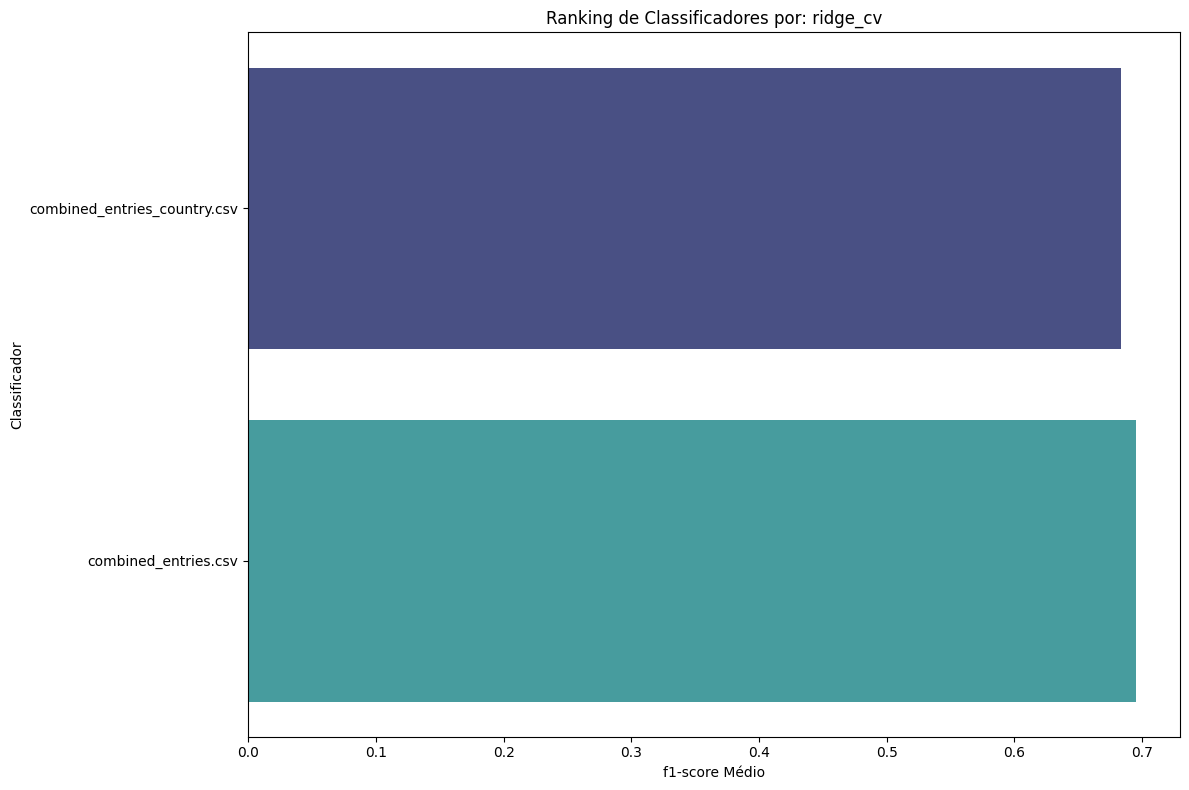

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


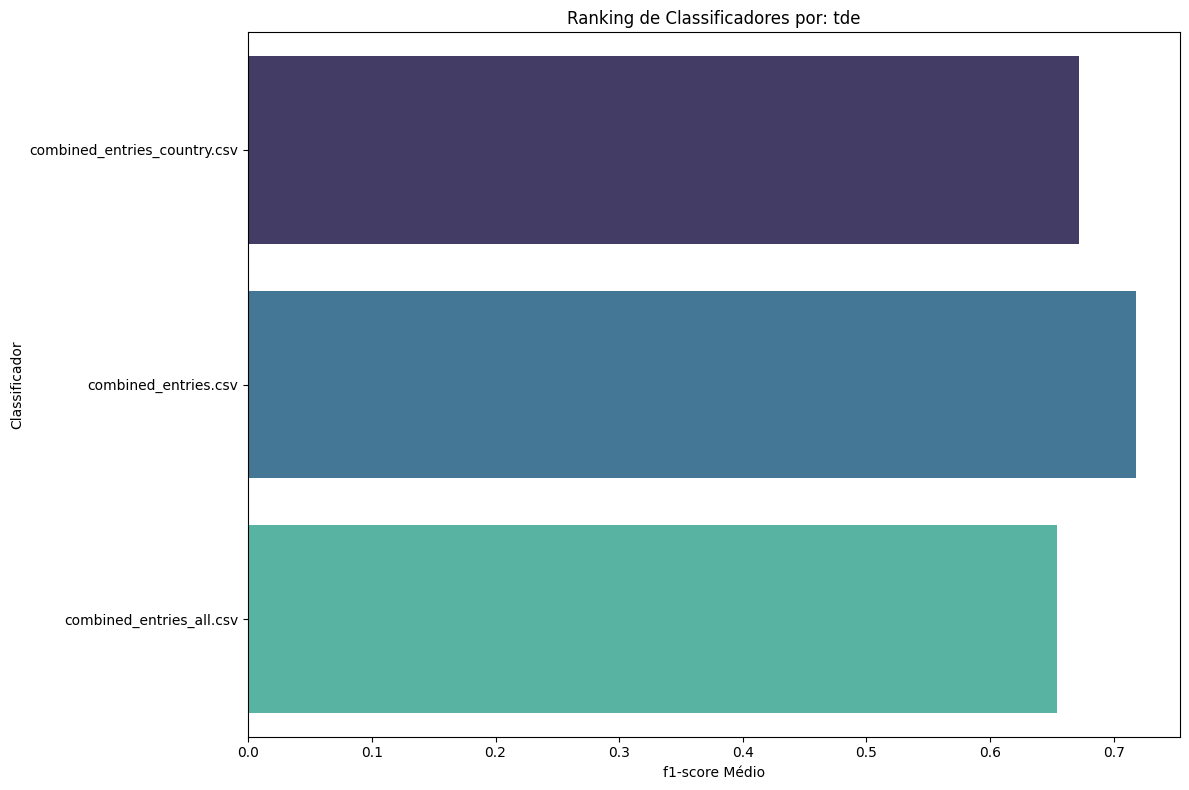

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


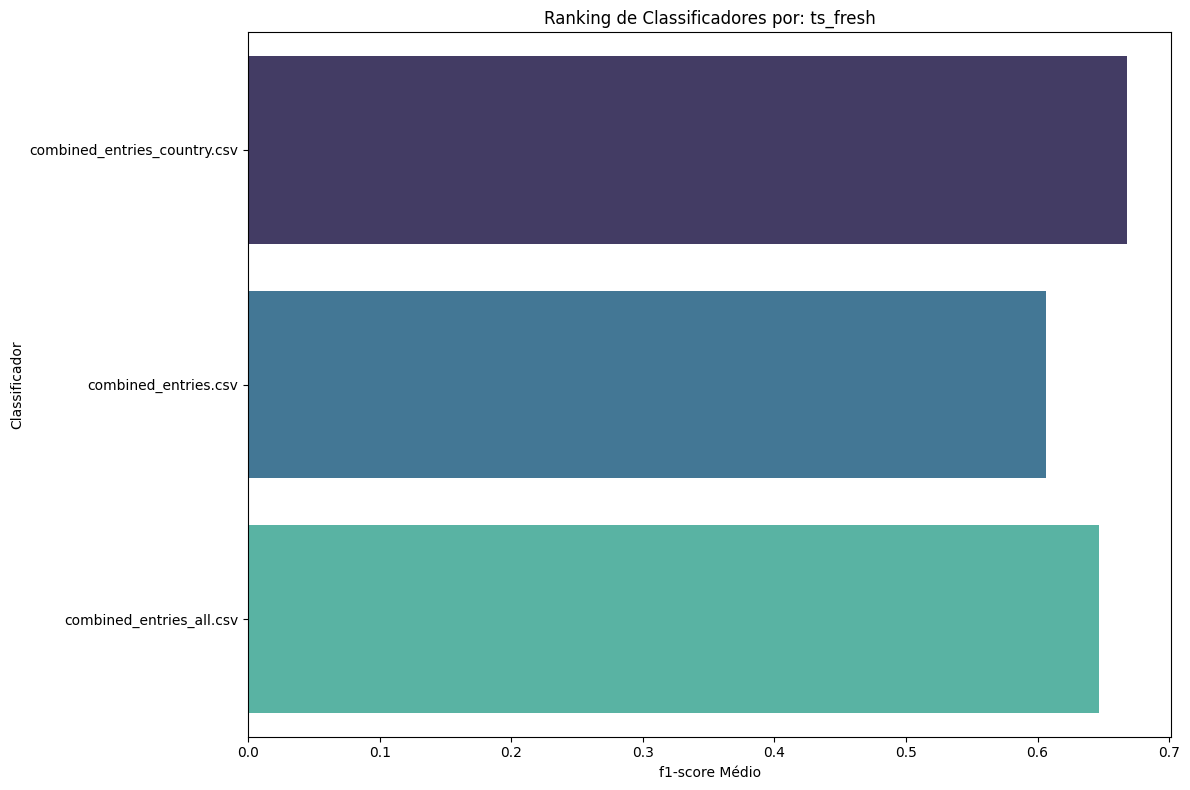

/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_74957/1053649308.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)


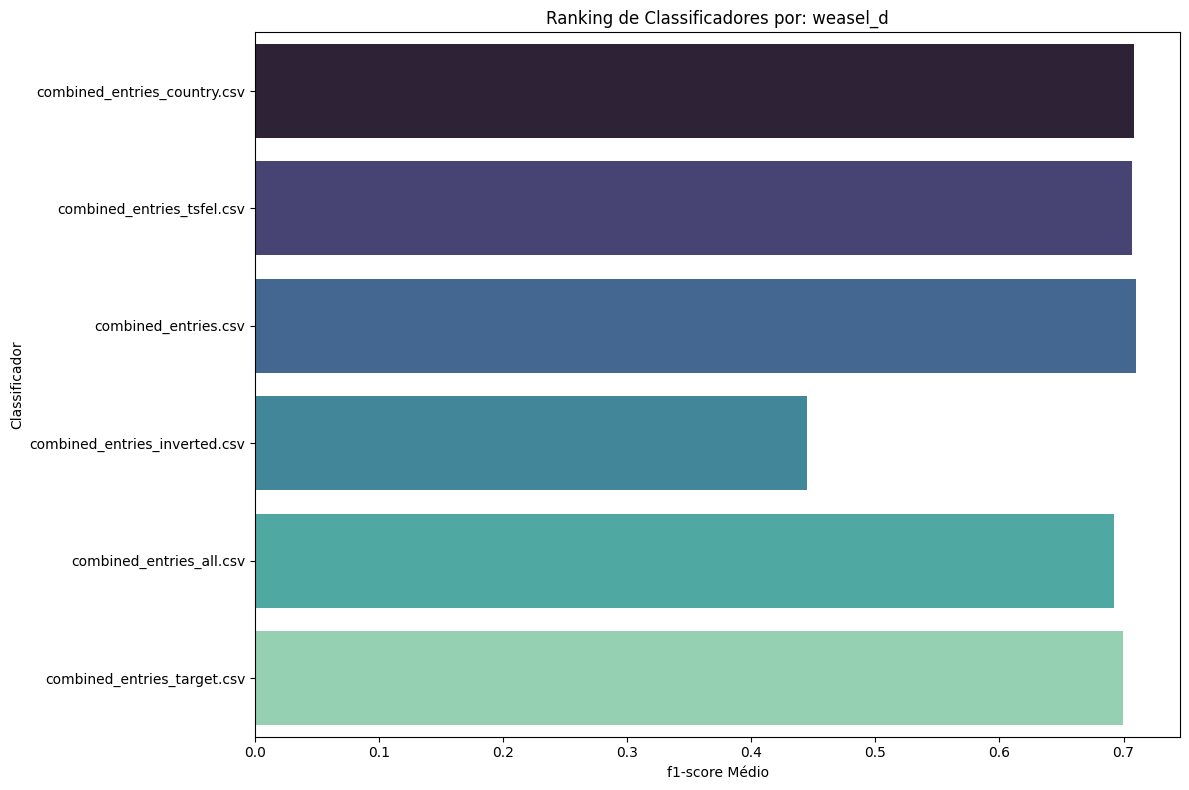

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_directory = '/Users/carolina/Desktop/Mestrado/classifiers/combined_entries' #aqui tem as cópias dos arquivos!!

all_entries = []

for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_directory, filename)
        df = pd.read_csv(file_path)
        df['source_file'] = filename 
        all_entries.append(df)

combined_df = pd.concat(all_entries, ignore_index=True)

combined_df.to_csv('../combined_entries_all_files.csv', index=False)

classifier_stats = combined_df.groupby('Classifier').agg({
    'f1_score_mean': ['mean', 'std']
}).reset_index()

classifier_stats.columns = ['Classifier', 'f1_score_mean', 'f1_score_std']

classifier_stats = classifier_stats.sort_values(by='f1_score_mean', ascending=False)

print("Ranking dos Classificadores por f1-score médio:")
print(classifier_stats)

# plt.figure(figsize=(12, 8))
# sns.barplot(x='f1_score_mean', y='Classifier', data=classifier_stats, palette='viridis', ci=None)
# plt.errorbar(
#     classifier_stats['f1_score_mean'],
#     classifier_stats['Classifier'],
#     xerr=classifier_stats['f1_score_std'],
#     fmt='o',
#     color='black',
#     capsize=3,
#     label='Desvio padrão'
# )
# plt.xlabel('f1-score Médio')
# plt.ylabel('Classificador')
# plt.title('Ranking de Classificadores por f1-score Médio')
# plt.legend()
# plt.tight_layout()

# plt.savefig('../classifier_ranking_f1_score.png', dpi=300)
# plt.show()

for Classifier, group_df in combined_df.groupby('Classifier'):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='f1_score_mean', y='source_file', data=group_df, palette='mako', ci=None)
    plt.xlabel('f1-score Médio')
    plt.ylabel('Classificador')
    plt.title(f'Ranking de Classificadores por: {Classifier}')
    plt.tight_layout()
    plt.savefig(f'../classifier_ranking_f1_score_{Classifier}.png', dpi=300)
    plt.show()
